<a href="https://colab.research.google.com/github/Shakshi3104/isJohnnys/blob/master/JohnnyFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZIPファイルを展開

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!unzip /content/drive/My\ Drive/データマイニング/2019/face.zip

Archive:  /content/drive/My Drive/データマイニング/2019/face.zip
   creating: face/
  inflating: __MACOSX/._face         
  inflating: face/.DS_Store          
  inflating: __MACOSX/face/._.DS_Store  
   creating: face/others/
   creating: face/johnnys/
   creating: face/others/赤楚衛二/
   creating: face/others/菅田将暉/
   creating: face/others/田中圭/
   creating: face/others/志尊淳/
   creating: face/others/千葉雄大/
   creating: face/others/岡田龍太郎/
   creating: face/others/綾野剛/
   creating: face/others/北村匠海/
   creating: face/others/飯島颯/
   creating: face/others/登坂広臣/
  inflating: __MACOSX/face/others/._登坂広臣  
   creating: face/others/関口メンディー/
  inflating: face/others/.DS_Store   
  inflating: __MACOSX/face/others/._.DS_Store  
   creating: face/others/板垣瑞生/
   creating: face/others/福士蒼汰/
   creating: face/others/桐山漣/
   creating: face/others/吉田仁人/
   creating: face/others/西岡健吾/
   creating: face/others/今市隆二/
  inflating: __MACOSX/face/others/._今市隆二  
   creating: face/others/永田薫/
   creating: face/others/竹

# コードの読み込み

In [6]:
!rm -R isJohnnys*
!git clone https://github.com/Shakshi3104/isJohnnys.git

rm: cannot remove 'isJohnnys*': No such file or directory
Cloning into 'isJohnnys'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 233 (delta 98), reused 189 (delta 59), pack-reused 0
Receiving objects: 100% (233/233), 391.75 KiB | 1.93 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import sys

sys.path.append("/content/isJohnnys")

In [0]:
import numpy as np
import pandas as pd

#  画像を読み込む

In [0]:
from images.dataset import Dataset

In [38]:
input_dir = "/content/face/"
dataset = Dataset(input_dir=input_dir, colab=True)
images, labels, detail_labels = dataset.load_data()

/content/face/johnnys/櫻井翔/img_32.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_0.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_55.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_11.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_2.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_14.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_58.png
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_8.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_42.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_31.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_15.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_97.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_88.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_49.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_48.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_75.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_25.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_26.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_40.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_47.jpg
(64, 64, 3)
/content/face/johnnys/櫻

In [39]:
print("shape", images.shape)
print("Johnnys Images", dataset.johnnys_image_num)
print("Others Images", dataset.others_image_num)

shape (7541, 64, 64, 3)
Johnnys Images 3596
Others Images 3945


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

## one-hot vector

In [42]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test_ = to_categorical(y_test, 2)

print(x_train.shape)
print(y_test_.shape)

(6032, 64, 64, 3)
(1509, 2)


# モデル

In [0]:
from networks.models import VGG, pretrained_VGG

## ImageNetを転移する

In [44]:
model, model_name = pretrained_VGG(weight_layer_num=16, frozen_block_num=3), "vgg16_imagenet"
# model, model_name = VGG(weight_layer_num=16), "vgg16"

layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: False
layer 8 trainable: False
layer 9 trainable: False
layer 10 trainable: False
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True


In [0]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

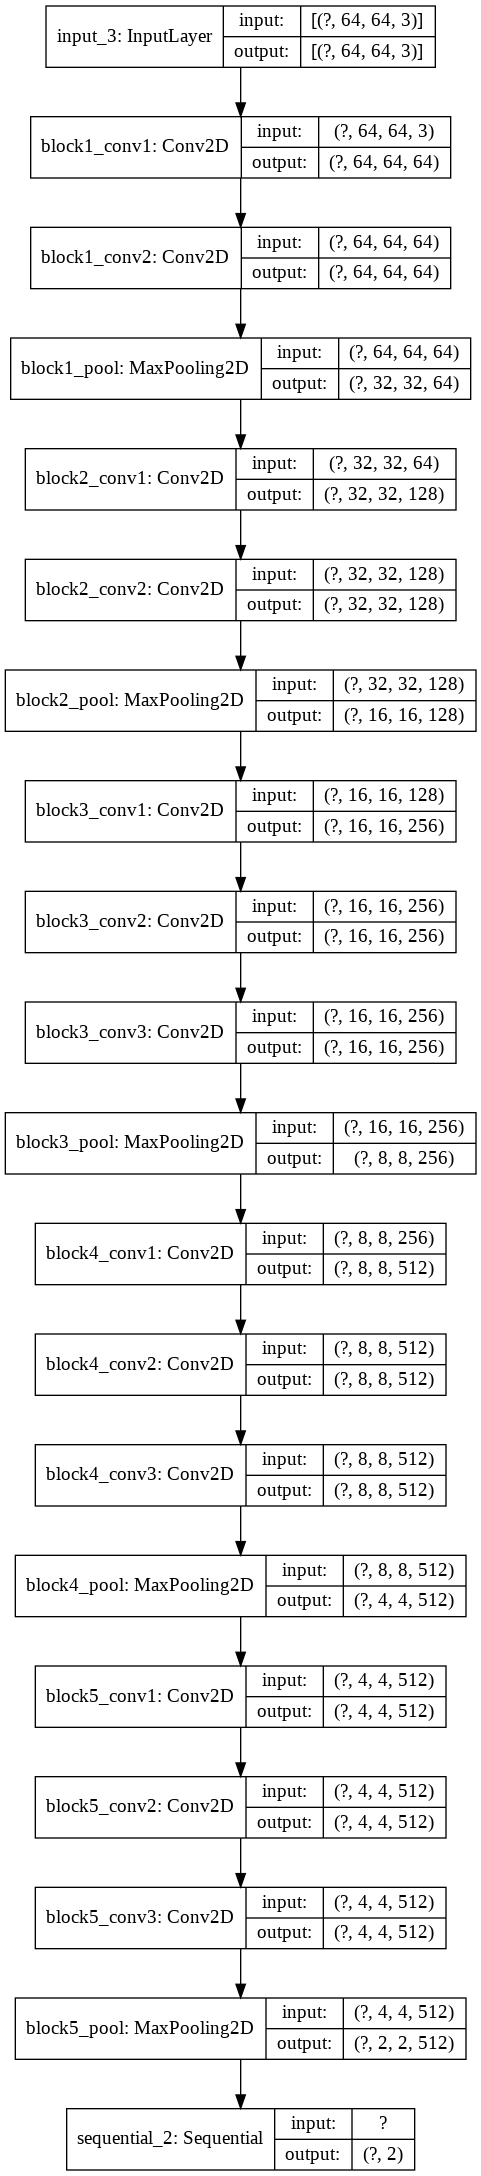

In [46]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
plot_model(model, to_file=model_name + ".png", show_shapes=True)

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
stack = model.fit(x_train, y_train, epochs=100, batch_size=300, 
                  validation_data=(x_test, y_test_))

Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 3s 463us/sample - loss: 0.7540 - acc: 0.5272 - val_loss: 0.7058 - val_acc: 0.4751
Epoch 2/100
6032/6032 [==============================] - 2s 412us/sample - loss: 0.6798 - acc: 0.5676 - val_loss: 0.6652 - val_acc: 0.5958
Epoch 3/100
6032/6032 [==============================] - 2s 412us/sample - loss: 0.6637 - acc: 0.5973 - val_loss: 0.6475 - val_acc: 0.6262
Epoch 4/100
6032/6032 [==============================] - 2s 411us/sample - loss: 0.6178 - acc: 0.6621 - val_loss: 0.6076 - val_acc: 0.6627
Epoch 5/100
6032/6032 [==============================] - 2s 411us/sample - loss: 0.5895 - acc: 0.6870 - val_loss: 0.5913 - val_acc: 0.6799
Epoch 6/100
6032/6032 [==============================] - 2s 414us/sample - loss: 0.5476 - acc: 0.7230 - val_loss: 0.5620 - val_acc: 0.7124
Epoch 7/100
6032/6032 [==============================] - 2s 414us/sample - loss: 0.5012 - acc: 0.7522 - val_loss: 0.54

In [49]:
score = model.evaluate(x_test, y_test_, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1237985425788573
Test accuracy: 0.7806494


In [0]:
from networks.training import plot_history

In [0]:
output_dir = "/content/drive/My Drive/データマイニング/2019/models/"

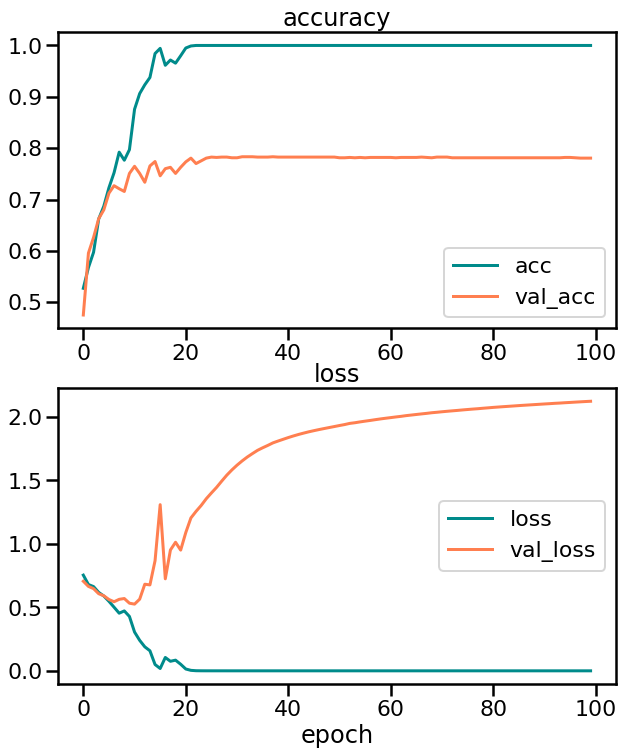

<Figure size 432x288 with 0 Axes>

In [52]:
plot_history(stack, filename=output_dir + "history_" + model_name + ".png")

In [0]:
# 重みを保存
model.save_weights(output_dir + model_name + ".hdf5")
# モデルを保存
model.save(output_dir + model_name + ".h5")